# Importing packages

In [1]:
# package imports
#basics
import numpy as np
import pandas as pd
import json

## Importing the Business Dataset

In [2]:
business=pd.read_csv("yelp_business.csv")

In [3]:
business

business_id                           name neighborhood  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"          NaN   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"          NaN   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"          NaN   
3       8DShNS-LuFqpEWIp0HxijA             "Sports Authority"          NaN   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"          NaN   
...                        ...                            ...          ...   
174562  ALV5R8NkZ1KGOZeuZl3u0A                "Whitby Toyota"          NaN   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"          NaN   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"          NaN   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"          NaN   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"          NaN   

                                 address            city state postal_code  \
0             "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                   "3101 Washington Rd"        McMurray    PA       15317   
2               "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3       "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                         "581 Howe Ave"  Cuyahoga Falls    OH       44221   
...                                  ...             ...   ...         ...   
174562            "1025 Dundas Street W"          Whitby    ON     L1P 1Z1   
174563             "3957 Brecksville Rd"       Richfield    OH       44286   
174564     "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565      "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566    "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
3       33.383147 -111.964725    3.0             9        0   
4       41.119535  -81.475690    3.5           116        1   
...           ...         ...    ...           ...      ...   
174562  43.873460  -78.968033    4.0             4        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  
0       Dentists;General Dentistry;Health & Medical;Or...  
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2       Departments of Motor Vehicles;Public Services ...  
3                                 Sporting Goods;Shopping  
4       American (New);Nightlife;Bars;Sandwiches;Ameri...  
...                                                   ...  
174562                             Car Dealers;Automotive  
174563                              Body Shops;Automotive  
174564      Home Services;Property Management;Real Estate  
174565                Spray Tanning;Tanning;Beauty & Spas  
174566               Drugstores;Shopping;Health & Medical  

[174567 rows x 13 columns]

# Data cleaning

## Business Dataset

## 1. Handling missing values

We see that there are missing values for neighborhood, city, state, postal code, latitude and longitude. We handle them below

In [4]:
business.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [5]:
business.drop(['neighborhood'],axis=1,inplace=True)

In [6]:
business=business.dropna()

In [7]:
business.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
dtype: int64

In [8]:
business

business_id                           name  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"   
3       8DShNS-LuFqpEWIp0HxijA             "Sports Authority"   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"   
...                        ...                            ...   
174562  ALV5R8NkZ1KGOZeuZl3u0A                "Whitby Toyota"   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"   

                                 address            city state postal_code  \
0             "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                   "3101 Washington Rd"        McMurray    PA       15317   
2               "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3       "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                         "581 Howe Ave"  Cuyahoga Falls    OH       44221   
...                                  ...             ...   ...         ...   
174562            "1025 Dundas Street W"          Whitby    ON     L1P 1Z1   
174563             "3957 Brecksville Rd"       Richfield    OH       44286   
174564     "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565      "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566    "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
3       33.383147 -111.964725    3.0             9        0   
4       41.119535  -81.475690    3.5           116        1   
...           ...         ...    ...           ...      ...   
174562  43.873460  -78.968033    4.0             4        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  
0       Dentists;General Dentistry;Health & Medical;Or...  
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2       Departments of Motor Vehicles;Public Services ...  
3                                 Sporting Goods;Shopping  
4       American (New);Nightlife;Bars;Sandwiches;Ameri...  
...                                                   ...  
174562                             Car Dealers;Automotive  
174563                              Body Shops;Automotive  
174564      Home Services;Property Management;Real Estate  
174565                Spray Tanning;Tanning;Beauty & Spas  
174566               Drugstores;Shopping;Health & Medical  

[173941 rows x 12 columns]

## 2. Handling data with Incorrect State 

Since our problem statement only deals with the customers in the US, we plan to remove the data outside of the scope that can adversely affect our prediction

In [9]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [10]:
business = business[business['state'].isin(states)]
business

business_id                           name  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"   
3       8DShNS-LuFqpEWIp0HxijA             "Sports Authority"   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"   
...                        ...                            ...   
174559  N-ujj4Xsq7Qg9A1fDGkUmA          "Luxe Appeal Studios"   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"   

                                 address            city state postal_code  \
0             "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                   "3101 Washington Rd"        McMurray    PA       15317   
2               "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3       "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                         "581 Howe Ave"  Cuyahoga Falls    OH       44221   
...                                  ...             ...   ...         ...   
174559   "626 W Indian School Rd, Ste E"         Phoenix    AZ       85013   
174563             "3957 Brecksville Rd"       Richfield    OH       44286   
174564     "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565      "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566    "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
3       33.383147 -111.964725    3.0             9        0   
4       41.119535  -81.475690    3.5           116        1   
...           ...         ...    ...           ...      ...   
174559  33.495350 -112.082386    4.0            18        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  
0       Dentists;General Dentistry;Health & Medical;Or...  
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2       Departments of Motor Vehicles;Public Services ...  
3                                 Sporting Goods;Shopping  
4       American (New);Nightlife;Bars;Sandwiches;Ameri...  
...                                                   ...  
174559  Hair Salons;Nail Technicians;Nail Salons;Eyela...  
174563                              Body Shops;Automotive  
174564      Home Services;Property Management;Real Estate  
174565                Spray Tanning;Tanning;Beauty & Spas  
174566               Drugstores;Shopping;Health & Medical  

[127885 rows x 12 columns]

In [11]:
business.reset_index(drop=True)

business_id                           name  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"   
3       8DShNS-LuFqpEWIp0HxijA             "Sports Authority"   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"   
...                        ...                            ...   
127880  N-ujj4Xsq7Qg9A1fDGkUmA          "Luxe Appeal Studios"   
127881  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"   
127882  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"   
127883  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"   
127884  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"   

                                 address            city state postal_code  \
0             "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                   "3101 Washington Rd"        McMurray    PA       15317   
2               "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3       "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                         "581 Howe Ave"  Cuyahoga Falls    OH       44221   
...                                  ...             ...   ...         ...   
127880   "626 W Indian School Rd, Ste E"         Phoenix    AZ       85013   
127881             "3957 Brecksville Rd"       Richfield    OH       44286   
127882     "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
127883      "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
127884    "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
3       33.383147 -111.964725    3.0             9        0   
4       41.119535  -81.475690    3.5           116        1   
...           ...         ...    ...           ...      ...   
127880  33.495350 -112.082386    4.0            18        1   
127881  41.243385  -81.636212    5.0             3        1   
127882  33.407914 -111.965098    1.5            19        1   
127883  40.517724  -80.091466    5.0            14        1   
127884  33.479861 -112.044689    5.0             4        1   

                                               categories  
0       Dentists;General Dentistry;Health & Medical;Or...  
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2       Departments of Motor Vehicles;Public Services ...  
3                                 Sporting Goods;Shopping  
4       American (New);Nightlife;Bars;Sandwiches;Ameri...  
...                                                   ...  
127880  Hair Salons;Nail Technicians;Nail Salons;Eyela...  
127881                              Body Shops;Automotive  
127882      Home Services;Property Management;Real Estate  
127883                Spray Tanning;Tanning;Beauty & Spas  
127884               Drugstores;Shopping;Health & Medical  

[127885 rows x 12 columns]

## 3. Handling incorrect latitude and longitude values

Since our customer base resides in the US, we remove data with incorrect latitude and longitude values

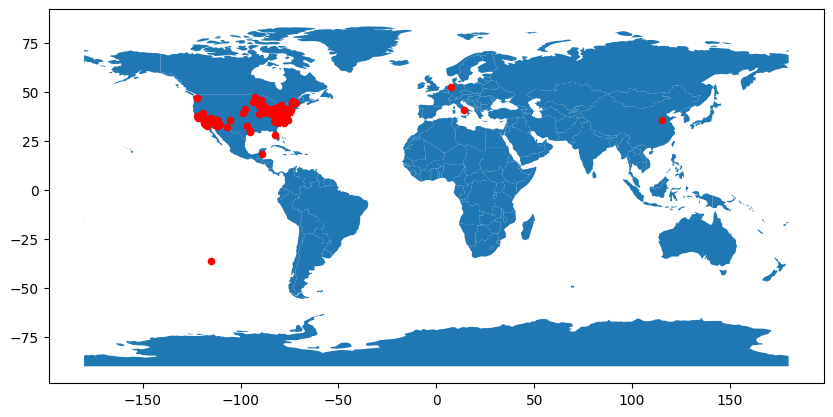

In [12]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(business['longitude'], business['latitude'])]
gdf = GeoDataFrame(business, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=20);

In [13]:
def is_in_us(lat, long):
    if lat < 24.5271 or lat > 49.7662:
        return False
    if long < -124.7844 or long > -66.9514:
        return False
    return True

# filter rows where coordinates are in US
business = business[business.apply(lambda row: is_in_us(row['latitude'], row['longitude']), axis=1)]
business

business_id                           name  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"   
3       8DShNS-LuFqpEWIp0HxijA             "Sports Authority"   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"   
...                        ...                            ...   
174559  N-ujj4Xsq7Qg9A1fDGkUmA          "Luxe Appeal Studios"   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"   

                                 address            city state postal_code  \
0             "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                   "3101 Washington Rd"        McMurray    PA       15317   
2               "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3       "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                         "581 Howe Ave"  Cuyahoga Falls    OH       44221   
...                                  ...             ...   ...         ...   
174559   "626 W Indian School Rd, Ste E"         Phoenix    AZ       85013   
174563             "3957 Brecksville Rd"       Richfield    OH       44286   
174564     "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565      "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566    "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
3       33.383147 -111.964725    3.0             9        0   
4       41.119535  -81.475690    3.5           116        1   
...           ...         ...    ...           ...      ...   
174559  33.495350 -112.082386    4.0            18        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  \
0       Dentists;General Dentistry;Health & Medical;Or...   
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...   
2       Departments of Motor Vehicles;Public Services ...   
3                                 Sporting Goods;Shopping   
4       American (New);Nightlife;Bars;Sandwiches;Ameri...   
...                                                   ...   
174559  Hair Salons;Nail Technicians;Nail Salons;Eyela...   
174563                              Body Shops;Automotive   
174564      Home Services;Property Management;Real Estate   
174565                Spray Tanning;Tanning;Beauty & Spas   
174566               Drugstores;Shopping;Health & Medical   

                           geometry  
0       POINT (-111.97860 33.33069)  
1        POINT (-80.10490 40.29169)  
2       POINT (-112.11531 33.52490)  
3       POINT (-111.96473 33.38315)  
4        POINT (-81.47569 41.11953)  
...                             ...  
174559  POINT (-112.08239 33.49535)  
174563   POINT (-81.63621 41.24339)  
174564  POINT (-111.96510 33.40791)  
174565   POINT (-80.09147 40.51772)  
174566  POINT (-112.04469 33.47986)  

[127880 rows x 13 columns]

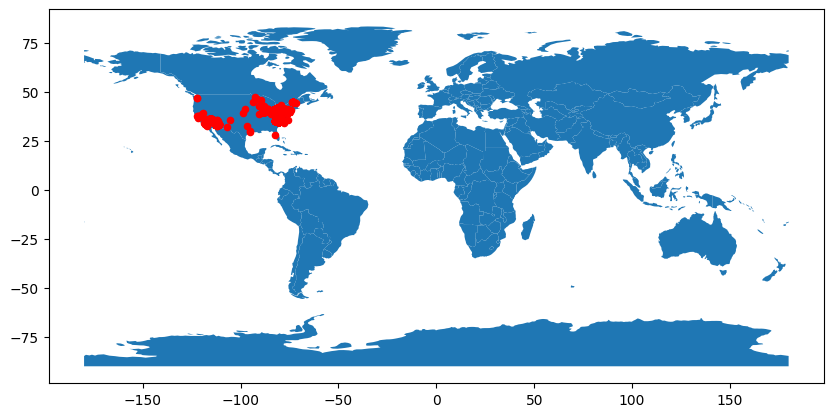

In [14]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(business['longitude'], business['latitude'])]
gdf = GeoDataFrame(business, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 10)), marker='o', color='red', markersize=20);

## 4. Removing Businesses that are closed

In [15]:
business=business[business['is_open']==1]

In [16]:
business

business_id                           name  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"   
6       kCoE3jvEtg6UVz5SOD3GVw                   "BDJ Realty"   
...                        ...                            ...   
174559  N-ujj4Xsq7Qg9A1fDGkUmA          "Luxe Appeal Studios"   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"   

                                address            city state postal_code  \
0            "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                  "3101 Washington Rd"        McMurray    PA       15317   
2              "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
4                        "581 Howe Ave"  Cuyahoga Falls    OH       44221   
6            "2620 Regatta Dr, Ste 102"       Las Vegas    NV       89128   
...                                 ...             ...   ...         ...   
174559  "626 W Indian School Rd, Ste E"         Phoenix    AZ       85013   
174563            "3957 Brecksville Rd"       Richfield    OH       44286   
174564    "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565     "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566   "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
4       41.119535  -81.475690    3.5           116        1   
6       36.207430 -115.268460    4.0             5        1   
...           ...         ...    ...           ...      ...   
174559  33.495350 -112.082386    4.0            18        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  \
0       Dentists;General Dentistry;Health & Medical;Or...   
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...   
2       Departments of Motor Vehicles;Public Services ...   
4       American (New);Nightlife;Bars;Sandwiches;Ameri...   
6       Real Estate Services;Real Estate;Home Services...   
...                                                   ...   
174559  Hair Salons;Nail Technicians;Nail Salons;Eyela...   
174563                              Body Shops;Automotive   
174564      Home Services;Property Management;Real Estate   
174565                Spray Tanning;Tanning;Beauty & Spas   
174566               Drugstores;Shopping;Health & Medical   

                           geometry  
0       POINT (-111.97860 33.33069)  
1        POINT (-80.10490 40.29169)  
2       POINT (-112.11531 33.52490)  
4        POINT (-81.47569 41.11953)  
6       POINT (-115.26846 36.20743)  
...                             ...  
174559  POINT (-112.08239 33.49535)  
174563   POINT (-81.63621 41.24339)  
174564  POINT (-111.96510 33.40791)  
174565   POINT (-80.09147 40.51772)  
174566  POINT (-112.04469 33.47986)  

[107944 rows x 13 columns]

## Making categories consistent by making them all lowercase

In [17]:
business['categories']=business['categories'].str.lower()
business

C:\Users\Prashant\AppData\Local\Temp\ipykernel_22804\3550042595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business['categories']=business['categories'].str.lower()


business_id                           name  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"   
6       kCoE3jvEtg6UVz5SOD3GVw                   "BDJ Realty"   
...                        ...                            ...   
174559  N-ujj4Xsq7Qg9A1fDGkUmA          "Luxe Appeal Studios"   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"   

                                address            city state postal_code  \
0            "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                  "3101 Washington Rd"        McMurray    PA       15317   
2              "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
4                        "581 Howe Ave"  Cuyahoga Falls    OH       44221   
6            "2620 Regatta Dr, Ste 102"       Las Vegas    NV       89128   
...                                 ...             ...   ...         ...   
174559  "626 W Indian School Rd, Ste E"         Phoenix    AZ       85013   
174563            "3957 Brecksville Rd"       Richfield    OH       44286   
174564    "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565     "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566   "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
4       41.119535  -81.475690    3.5           116        1   
6       36.207430 -115.268460    4.0             5        1   
...           ...         ...    ...           ...      ...   
174559  33.495350 -112.082386    4.0            18        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  \
0       dentists;general dentistry;health & medical;or...   
1       hair stylists;hair salons;men's hair salons;bl...   
2       departments of motor vehicles;public services ...   
4       american (new);nightlife;bars;sandwiches;ameri...   
6       real estate services;real estate;home services...   
...                                                   ...   
174559  hair salons;nail technicians;nail salons;eyela...   
174563                              body shops;automotive   
174564      home services;property management;real estate   
174565                spray tanning;tanning;beauty & spas   
174566               drugstores;shopping;health & medical   

                           geometry  
0       POINT (-111.97860 33.33069)  
1        POINT (-80.10490 40.29169)  
2       POINT (-112.11531 33.52490)  
4        POINT (-81.47569 41.11953)  
6       POINT (-115.26846 36.20743)  
...                             ...  
174559  POINT (-112.08239 33.49535)  
174563   POINT (-81.63621 41.24339)  
174564  POINT (-111.96510 33.40791)  
174565   POINT (-80.09147 40.51772)  
174566  POINT (-112.04469 33.47986)  

[107944 rows x 13 columns]

## 5. Filtering out only restaurants

Since we are building a restaurant recommendation system, we are not interested in other businesses. So we filter our population

In [18]:
restaurant_bdf=business[(business.categories.str.contains('restaurant'))|(business.categories.str.contains('food'))]

In [19]:
restaurant_bdf=restaurant_bdf.reset_index(drop=True)
restaurant_bdf=restaurant_bdf.drop('geometry',axis=1)
restaurant_bdf

business_id                                name  \
0      PfOCPjBrlQAnz__NXj9h_w          "Brick House Tavern + Tap"   
1      EsMcGiZaQuG1OOvL9iUFug                  "Any Given Sundae"   
2      fNMVV_ZX7CJSDWQGdOM8Nw        "Showmars Government Center"   
3      Dj0S-Oe4ytRJzMGUPgYUkw                      "Panera Bread"   
4      tRVx2c89coruPRwYhGTcTw                              "Yuzu"   
...                       ...                                 ...   
30867  CslboLl_NXJDf5Hj3YsDyg     "Carlone's Candy and Ice Cream"   
30868  Gr-2oBg4XyduSKbvnE-i9g  "Salt & Lime Modern Mexican Grill"   
30869  Ls_nR1MEcsOw5KuTlh0dfQ               "Cole's Public House"   
30870  pUhU5ohYv65g8B47dTXAKA                         "Starbucks"   
30871  UdEmYOnk2iJDY9lpEPAlJQ         "Floridino's Pizza & Pasta"   

                              address            city state postal_code  \
0                      "581 Howe Ave"  Cuyahoga Falls    OH       44221   
1             "2612 Brandt School Rd"         Wexford    PA       15090   
2                      "600 E 4th St"       Charlotte    NC       28202   
3           "38295 Chestnut Ridge Rd"          Elyria    OH       44035   
4                 "13603 Madison Ave"        Lakewood    OH       44107   
...                               ...             ...   ...         ...   
30867              "1515 Madison Ave"     Painesville    OH       44077   
30868     "9397 E Shea Blvd, Ste 115"      Scottsdale    AZ       85260   
30869                 "209 S Main St"         Amherst    OH       44001   
30870    "591 N Eastern Ave, Ste 110"       Las Vegas    NV       89101   
30871  "590 N Alma School Rd, Ste 35"        Chandler    AZ       85224   

        latitude   longitude  stars  review_count  is_open  \
0      41.119535  -81.475690    3.5           116        1   
1      40.615102  -80.091349    5.0            15        1   
2      35.221647  -80.839345    3.5             7        1   
3      41.343078  -82.067140    2.0             4        1   
4      41.476846  -81.786971    3.5            78        1   
...          ...         ...    ...           ...      ...   
30867  41.726780  -81.197096    4.0             3        1   
30868  33.581511 -111.879218    3.5           223        1   
30869  41.398165  -82.226472    4.5            21        1   
30870  36.173589 -115.116779    2.5            35        1   
30871  33.311383 -111.859604    4.0           374        1   

                                              categories  
0      american (new);nightlife;bars;sandwiches;ameri...  
1            coffee & tea;ice cream & frozen yogurt;food  
2                     restaurants;american (traditional)  
3                      soup;salad;sandwiches;restaurants  
4      nightlife;izakaya;comfort food;cocktail bars;a...  
...                                                  ...  
30867  cooking schools;specialty schools;food;educati...  
30868  salad;food;beer;wine & spirits;restaurants;mex...  
30869  bars;gastropubs;nightlife;restaurants;pubs;san...  
30870                                  coffee & tea;food  
30871  pizza;event planning & services;italian;catere...  

[30872 rows x 12 columns]

In [20]:
business_id=restaurant_bdf.business_id.values

## Review Dataset

In [21]:
from dask import dataframe as df
review=pd.read_csv('yelp_review.csv')

In [22]:
review.dtypes

review_id      object
user_id        object
business_id    object
stars           int64
date           object
text           object
useful          int64
funny           int64
cool            int64
dtype: object

## 6. Keeping reviews only for restaurants in the US

We only need the reviews for the restaurants in the US that are not closed. Here we filter them out

In [23]:
rest_review=review[review['business_id'].isin(business_id)]

## 7. Parsing the date to datetime

In [24]:
rest_review=rest_review.reset_index(drop=True)
rest_review['date']=pd.to_datetime(rest_review['date'])

In [25]:
rest_review

review_id                 user_id  \
0        bifEpGC-8TE19JPZwn-Rpw  _L2SZSwf7A6YSrIHy_q4cw   
1        BF0ANB54sc_f-3_howQBCg  ssuXFjkH4neiBgwv-oN4IA   
2        DbLUpPT61ykLTakknCF9CQ  ssuXFjkH4neiBgwv-oN4IA   
3        gN6GARS_BRr5UX2D3WAH0w  nOTl4aPC4tKHK35T3bNauQ   
4        isGkB9diabUw4YUuTs-wNg  PWKrsnhlNUN6_oMaQAIajQ   
...                         ...                     ...   
2448498  hGUr1put2E6TpqMeI6lFXw  4wA_CZT08V3d8cGaAWuXog   
2448499  eQrRirSSit5MdZdtoYuHuw  vPCYOCTMTixFXn1_60UjJQ   
2448500  _HubomG7kARyUVuemJbZbQ  vPCYOCTMTixFXn1_60UjJQ   
2448501  Va8hQZYCDh3SCAROgfEZyA  mPjPyipaD0C_myqWqDipZg   
2448502  C0uT2UJQ3yz9hqE4h3sy2A  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars       date  \
0        TIf6ZByLdAXratne18kjoA      5 2009-09-01   
1        JlNeaOymdVbE6_bubqjohg      1 2014-08-09   
2        0Rni7ocMC_Lg2UH0lDeKMQ      1 2014-08-09   
3        xVEtGucSRLk5pxxN0t4i6g      5 2012-08-23   
4        wjW6YN9s-iDq7l9PcUsPZw      5 2014-01-16   
...                         ...    ...        ...   
2448498  lLMJsTchKYF1O0fpNWpCRA      5 2016-06-10   
2448499  04u-szAykldu-caSDHQaKA      1 2013-10-28   
2448500  LBAkHJJfCoDj9aa5sc0Mxw      1 2013-12-13   
2448501  096qNc7waeRlReivCm2lXw      3 2015-10-25   
2448502  n0NH0FW8NU3zfeJY3QluMQ      3 2015-10-25   

                                                      text  useful  funny  \
0        We had these guys cater our wedding.  We ended...       2      0   
1        We always go to the chevo's in chandler which ...       3      0   
2        This place is always so dirty and grimy, been ...       6      0   
3        We got recommendations for this place from my ...       0      0   
4        An awesome place to eat. They are always very ...       0      0   
...                                                    ...     ...    ...   
2448498  I love this place!! I always stop by after wor...       0      0   
2448499  Never again.  Went there last nite with a frie...       0      0   
2448500  For anyone that is actually from Illinois to d...       2      1   
2448501  Cafeteria style setting. Was staying at the ho...       0      0   
2448502  Went in for a snack on a sat night.   Bar area...       1      0   

         cool  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
2448498     0  
2448499     0  
2448500     1  
2448501     0  
2448502     0  

[2448503 rows x 9 columns]

## 8. Identifying and Removing reviews with encoded HTML

In [26]:
print(rest_review[rest_review.text.str.contains('&[a-zA-Z]+;')].count())
rest_review[rest_review.text.str.contains('&[a-zA-Z]+;')]


review_id      47
user_id        47
business_id    47
stars          47
date           47
text           47
useful         47
funny          47
cool           47
dtype: int64


review_id                 user_id  \
10261    Gi2Jx_QwCeEROrm5P8PUpw  Nf230EdEu-eYaaI5PhgV9w   
43168    7Eg3WyfCx7lUd-O1YpkLMA  jR00ESlM7Rmg9tFYwMbh4A   
111913   wkUHHpckDtFHhpEtsPQ22A  Ti5Bpj0eRmRYTBnep63S1Q   
117382   -HyJzP4muvUJUn1ebRO7YQ  SY4Zk2paWmR3bdKW2SXLvA   
180070   3ol1SY5ZuuoP_G8ArgSAWA  hh6FuitvpgwDPITgvSE4wQ   
198234   MkCvT_bFR9vVSSR-YaKfsA  XEHZoTDWjw3w-gcQyYIe4g   
253906   JXVsQmdqpmTAqFjlXIjcRw  RiU99Ze8UEoUutHMl73HIg   
359027   Y_AIRr1yfuiSTQsMAwNycQ  K5FrmVM70cJDbMiZ9ywMag   
372233   GJnNgD3boiqrH1ScR5eAIw  kjYbPkrbgPMVUAjungJ4Aw   
424939   BsriHyn34rLeFzykYTdd9g  ZpUI9ze0YlA6nMSHwx3ZYQ   
443830   B02is-EfjAwKOQ8XO5zgSg  Ji9PeffxjwqPLO7pEfSpKQ   
641684   SU9wiihWv338hLCP_ftBZA  OKStBc65ZyCyvNnheAhgrg   
683414   wNhJuWKfpib4Au6BqYq65A  U5yuZTdCBKomSNdyhU3feg   
778141   VglonqaX0DYxzaRcYZNtKg  Wcl-yr7T-nFr_khqG4A6ww   
784767   E9wqcQVyNMQbRmyX13t9_g  SCYd8BnpdTCoGIFUIw_SWA   
790249   mK3t6p5lG9e71ETLdqP_WA  62GNFh5FySkA3MbrQmnqvg   
830289   DJSHqUXDhBxE5vnSvk-Axg  SZbctVhiIeS1PYI25Dld8A   
899822   luUhQFq1Oh3DMBnuyDsSIg  R3jMcisnWU-gjjSXgWNXvw   
963200   5vzl8u5wrHHYFvzDwvAEJQ  Q6EVFDbBNnD8jY1LxpcQCw   
1114300  -8hc4sUXJJ1H2FiNn59rZQ  tyCk-vHklFSO8G9cGK2ErA   
1163384  cA_lJRTQlYTuffbztfeZdg  6EMYVjfLme1T6zUhL_KwTQ   
1203446  e1pH10tRLel-mr1Tzib1Vg  pGbuFo9KKBRkGpOy1Lpevw   
1260782  R6XDD8wjVTbHcsQMuzr13g  kBhI7BSPM2HyRtmUcDZv0g   
1283022  eUjwFxy_LrOlbsUCIi3qYA  R331t68FPezqSA5ts-c8CQ   
1301947  fpWAIj2i__IE0C34cP9ErQ  omdFFfrlUZNs03qg0ffEKw   
1409774  IA5Zgevs3imsotDKGQOPYg  1Tnl1zk9eLFO4N5WLhcMZg   
1432773  lWAgBBGV6slo0xvCQXEtwg  Xmhm8NUAOUsJ3CNRH_LZ0A   
1440466  seDby-AmtMlQJmrU6mgBJA  hGxKMRt9f4drE10NUwsjGQ   
1494735  tl9G4p_UWoUTH0lhTcVvkQ  8DqQqPnWLMllH2Dd0bETtQ   
1524260  YOKu9uVVB1Kl0wihnYEuew  7L8utEpYiVj3pNNjZkQaLQ   
1570368  7HuFO7RU47EqsDwSaFXkog  HT7T6OaKuJHU35j9u0LUDA   
1682556  TVi4OTJm0dNgrR11Pz3Asg  IzgEl5xXE5cdMTv1Fxspig   
1683805  1l0EfvXl1Nv5_s4rdIwk2A  zlf9A6EOSMsLPPi1k0VHiA   
1759990  c2vhQINKOvGKEZb-tSF3mg  B7aR8VlLMGzaJ7NHC-jeMQ   
1786830  wQFOZU5R4BWTZBH2MLJeSA  FWHbXUCndMVogI5EuH_TTQ   
1801011  gKzrVYWxFYbjGhpoWJypbA  CkHtxq_mH-HAJsiUz22IuQ   
1922593  Kj0TP_mDpZ0Nj9G7AkI-7A  llGAONe4UfhzfascT-I72A   
1932248  sqhYTL__-JYcwqxr44zkBw  9d52DhEbJQ1w5LXaZw4nzQ   
1995445  8mL7fa1pkSN7OxqBmrapcQ  m-QqsOt43FK2g7bKb8Lxiw   
2003053  uj1HpQCc8X7Vx36O3JDrag  LbzdxzImUy2plFutJ_aH3w   
2020990  3-WeJrKuQvKUXsYoSMdzlA  eO4O7bHfT2fNZ7JNJfvgyg   
2139429  U3TlJBUb0xCulZSmyljmjA  ZfC_Bq_sfsNWti72SiSk1Q   
2332293  2ithPBv7XCHMgwWDsjinVA  7d0HebQn7PGGEWHsiYUQVw   
2335734  9pcXiRD2NdNuJUuU74UyUA  p_azadim_uWFOXAhhKB3ag   
2347154  Izzvd9zYIUQOhZAQ926kmg  gJ7q645lk7hAwuj6YQzf0g   
2355513  D-gfOlI7yIRYsKGQmdbzBw  SFeJIeDP3HOI2nFk906Wyg   
2412369  d2bLjNrlZ42FKW0K-q4o-Q  ruqe3slVDfXdXVMPtM976g   

                    business_id  stars       date  \
10261    r3kFRJuy7CTxamZycndqGw      1 2016-03-07   
43168    WQyGqfFKd-baBTVfZWzeTw      4 2010-09-30   
111913   LtXy1VinKWfuLFslVarKRw      5 2008-06-19   
117382   TEaBolNAkOdRm2gvIYz4OQ      5 2009-05-11   
180070   SIWwh4m6kkvUaa5skrVAQQ      5 2009-08-10   
198234   9OwoNe9ksUeU6zYasGhrPA      2 2009-08-20   
253906   7sPNbCx7vGAaH7SbNPZ6oA      4 2010-06-21   
359027   PuB-oSX_fMh0822kChScrA      4 2008-10-01   
372233   VJ3ndBYrudQFeTIfPUnX-Q      3 2008-09-10   
424939   MXC9pwIxovWUc9yu1F8OxA      4 2009-03-29   
443830   _c3ixq9jYKxhLUB0czi0ug      4 2009-01-19   
641684   R3TC2oq8fQK9c9BNMZ-ynA      2 2010-08-13   
683414   V1hH7vAq5wNDo2P3z8zJLg      4 2009-08-18   
778141   bRZSm_1UQdmU6QWZfO9h6w      5 2010-01-16   
784767   v5zzCmCf1L4Utjit12EMuQ      3 2017-05-21   
790249   dJUhEAq8SP-0vQ1aVU7vVA      3 2007-04-28   
830289   L192hPeosT4Z1qRO8jQbfQ      5 2010-12-04   
899822   j5nPiTwWEFr-VsePew7Sjg      4 2009-07-25   
963200   bRZSm_1UQdmU6QWZfO9h6w      4 2010-06-02   
1114300  6V_7ldr9tjmet0BdAnC34A      5 2009-08-08   
1163384  J4CATH00YZrq8Bne2S4_cw      4 2013-02-27   
1203446  GTR39A2jwNIS_N

## User Dataset

In [27]:
user=pd.read_csv('yelp_user.csv')
user

user_id    name  review_count yelping_since  \
0        JJ-aSuM4pCFPdkfoZ34q0Q   Chris            10    2013-09-24   
1        uUzsFQn_6cXDh6rPNGbIFA   Tiffy             1    2017-03-02   
2        mBneaEEH5EMyxaVyqS-72A    Mark             6    2015-03-13   
3        W5mJGs-dcDWRGEhAzUYtoA  Evelyn             3    2016-09-08   
4        4E8--zUZO1Rr1IBK4_83fg    Lisa            11    2012-07-16   
...                         ...     ...           ...           ...   
1326095  LODBIwiAcKxRi7Wz-sFsKw    Neth             1    2015-02-21   
1326096  JpY2ozlb30z_AZCq2YX34g    Mike             1    2014-08-01   
1326097  AU9aZSA1rAjNE5cFcZTVMA   Jalin            12    2015-11-11   
1326098  s1BZ7-rpqb3xRKcxvArXsQ   Cindy            33    2014-06-28   
1326099  q-1Tz4SvaTpGEMhI_xwm0Q     Amy             5    2010-05-17   

                                                   friends  useful  funny  \
0        0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...       0      0   
1                                                     None       0      0   
2                                                     None       0      0   
3                                                     None       0      0   
4                                                     None       4      0   
...                                                    ...     ...    ...   
1326095                                               None       0      0   
1326096                                               None       2      0   
1326097                                               None       0      0   
1326098                                               None       5      0   
1326099                                               None       1      0   

         cool  fans elite  ...  compliment_more  compliment_profile  \
0           0     0  None  ...                0                   0   
1           0     0  None  ...                0                   0   
2           0     0  None  ...                0                   0   
3           0     0  None  ...                0                   0   
4           0     0  None  ...                0                   0   
...       ...   ...   ...  ...              ...                 ...   
1326095     0     0  None  ...                0                   0   
1326096     0     0  None  ...                0                   0   
1326097     0     0  None  ...                0                   0   
1326098     0     0  None  ...                0                   0   
1326099     0     0  None  ...                0                   0   

         compliment_cute  compliment_list  compliment_note  compliment_plain  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
1326095                0                0                0                 0   
1326096                0                0                0                 0   
1326097                0                0                0                 0   
1326098                0                0                0                 1   
1326099                0                0                0                 0   

         compliment_cool  compliment_funny  compliment_writer  \
0                      0                 0                  0   
1                      0                 0                  0   
2                      0                 0                  0   
3                      0                 0                  0   
4                      0                 0                  1   
...                  ...               ...

## Removing Null/Empty values 

In [28]:
user.isnull().sum()

user_id                 0
name                  497
review_count            0
yelping_since           0
friends                 0
useful                  0
funny                   0
cool                    0
fans                    0
elite                   0
average_stars           0
compliment_hot          0
compliment_more         0
compliment_profile      0
compliment_cute         0
compliment_list         0
compliment_note         0
compliment_plain        0
compliment_cool         0
compliment_funny        0
compliment_writer       0
compliment_photos       0
dtype: int64

## 9. Remove columns that are not useful for recommendation

In [29]:
user=user[['user_id','name','review_count','yelping_since']]

In [30]:
user.isnull().sum()

user_id            0
name             497
review_count       0
yelping_since      0
dtype: int64

In [31]:
user=user.dropna()

In [32]:
user.isnull().sum()

user_id          0
name             0
review_count     0
yelping_since    0
dtype: int64

## Parsing the date string to datetime

In [33]:
user['yelping_since']=pd.to_datetime(user['yelping_since'])

In [34]:
user.dtypes

user_id                  object
name                     object
review_count              int64
yelping_since    datetime64[ns]
dtype: object

## 10. Checking duplicate users

In [35]:
duplicates=user[user.duplicated(['user_id'])]

In [36]:
duplicates

Empty DataFrame
Columns: [user_id, name, review_count, yelping_since]
Index: []

## Business Hours Dataset

In [37]:
business_hours=pd.read_csv('yelp_business_hours.csv')

In [38]:
business_hours

business_id     monday    tuesday  wednesday   thursday  \
0       FYWN1wneV18bWNgQjJ2GNg  7:30-17:0  7:30-17:0  7:30-17:0  7:30-17:0   
1       He-G7vWjzVUysIKrfNbPUQ   9:0-20:0   9:0-20:0   9:0-20:0   9:0-20:0   
2       KQPW8lFf1y5BT2MxiSZ3QA       None       None       None       None   
3       8DShNS-LuFqpEWIp0HxijA  10:0-21:0  10:0-21:0  10:0-21:0  10:0-21:0   
4       PfOCPjBrlQAnz__NXj9h_w   11:0-1:0   11:0-1:0   11:0-1:0   11:0-1:0   
...                        ...        ...        ...        ...        ...   
174562  ALV5R8NkZ1KGOZeuZl3u0A   7:0-18:0   7:0-18:0   7:0-18:0   7:0-18:0   
174563  gRGalHVu6BcaUDIAGVW_xQ   8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0   
174564  XXvZBIHoJBU5d6-a-oyMWQ  8:30-17:0  8:30-17:0  8:30-17:0  8:30-17:0   
174565  lNpPGgM96nPIYM1shxciHg  10:0-20:0  10:0-20:0  10:0-20:0  10:0-20:0   
174566  viKaP26BcHU6cLx8sf4gKg   9:0-18:0   9:0-18:0   9:0-18:0   9:0-18:0   

           friday   saturday     sunday  
0       7:30-17:0       None       None  
1        9:0-16:0   8:0-16:0       None  
2            None       None       None  
3       10:0-21:0  10:0-21:0  11:0-19:0  
4        11:0-1:0   11:0-2:0   11:0-0:0  
...           ...        ...        ...  
174562   7:0-18:0   8:0-16:0       None  
174563   8:0-17:0   9:0-12:0       None  
174564  8:30-17:0       None       None  
174565  10:0-18:0  11:0-14:0  12:0-14:0  
174566   9:0-18:0       None       None  

[174567 rows x 8 columns]

## Merging business hours with Business Dataframe

We merge the business hours to filter out businesses that are not participating or have been filtered out before 

In [39]:
business_final=pd.merge(restaurant_bdf,business_hours,on='business_id',how='inner')
business_final

business_id                                name  \
0      PfOCPjBrlQAnz__NXj9h_w          "Brick House Tavern + Tap"   
1      EsMcGiZaQuG1OOvL9iUFug                  "Any Given Sundae"   
2      fNMVV_ZX7CJSDWQGdOM8Nw        "Showmars Government Center"   
3      Dj0S-Oe4ytRJzMGUPgYUkw                      "Panera Bread"   
4      tRVx2c89coruPRwYhGTcTw                              "Yuzu"   
...                       ...                                 ...   
30867  CslboLl_NXJDf5Hj3YsDyg     "Carlone's Candy and Ice Cream"   
30868  Gr-2oBg4XyduSKbvnE-i9g  "Salt & Lime Modern Mexican Grill"   
30869  Ls_nR1MEcsOw5KuTlh0dfQ               "Cole's Public House"   
30870  pUhU5ohYv65g8B47dTXAKA                         "Starbucks"   
30871  UdEmYOnk2iJDY9lpEPAlJQ         "Floridino's Pizza & Pasta"   

                              address            city state postal_code  \
0                      "581 Howe Ave"  Cuyahoga Falls    OH       44221   
1             "2612 Brandt School Rd"         Wexford    PA       15090   
2                      "600 E 4th St"       Charlotte    NC       28202   
3           "38295 Chestnut Ridge Rd"          Elyria    OH       44035   
4                 "13603 Madison Ave"        Lakewood    OH       44107   
...                               ...             ...   ...         ...   
30867              "1515 Madison Ave"     Painesville    OH       44077   
30868     "9397 E Shea Blvd, Ste 115"      Scottsdale    AZ       85260   
30869                 "209 S Main St"         Amherst    OH       44001   
30870    "591 N Eastern Ave, Ste 110"       Las Vegas    NV       89101   
30871  "590 N Alma School Rd, Ste 35"        Chandler    AZ       85224   

        latitude   longitude  stars  review_count  is_open  \
0      41.119535  -81.475690    3.5           116        1   
1      40.615102  -80.091349    5.0            15        1   
2      35.221647  -80.839345    3.5             7        1   
3      41.343078  -82.067140    2.0             4        1   
4      41.476846  -81.786971    3.5            78        1   
...          ...         ...    ...           ...      ...   
30867  41.726780  -81.197096    4.0             3        1   
30868  33.581511 -111.879218    3.5           223        1   
30869  41.398165  -82.226472    4.5            21        1   
30870  36.173589 -115.116779    2.5            35        1   
30871  33.311383 -111.859604    4.0           374        1   

                                              categories      monday  \
0      american (new);nightlife;bars;sandwiches;ameri...    11:0-1:0   
1            coffee & tea;ice cream & frozen yogurt;food        None   
2                     restaurants;american (traditional)    7:0-15:0   
3                      soup;salad;sandwiches;restaurants   6:30-21:0   
4      nightlife;izakaya;comfort food;cocktail bars;a...    12:0-2:0   
...                                                  ...         ...   
30867  cooking schools;specialty schools;food;educati...   12:0-21:0   
30868  salad;food;beer;wine & spirits;restaurants;mex...   11:0-22:0   
30869  bars;gastropubs;nightlife;restaurants;pubs;san...  11:30-22:0   
30870                                  coffee & tea;food    5:0-21:0   
30871  pizza;event planning & services;italian;catere...   11:0-21:0   

          tuesday   wednesday    thursday      friday    saturday     sunday  
0        11:0-1:0    11:0-1:0    11:0-1:0    11:0-1:0    11:0-2:0   11:0-0:0  
1            None        None        None        None        None       None  
2        7:0-15:0    7:0-15:0    7:0-15:0    7:0-15:0        None       None  
3       6:30-21:0   6:30-21:0   6:30-21:0   6:30-22:0    7:0-22:0   7:0-20:0  
4        12:0-2:0    12:0-2:0    12:0-2:0    12:0-2:0    11:0-2:0       None  
...           ...         ...         ...         ...         ...        ...  
30867   12:0-21:0   12:0-21:0   12:0-21:0   12:0-21:0   12:0-21:0  12:0-21:0  
30868   11:0-22:0   11:0-22:0   11:0-22:0   11

## 12. Replacing None Label to Timing Unavailable

In [40]:
business_final=business_final.replace('None',"unavailable")
business_final

business_id                                name  \
0      PfOCPjBrlQAnz__NXj9h_w          "Brick House Tavern + Tap"   
1      EsMcGiZaQuG1OOvL9iUFug                  "Any Given Sundae"   
2      fNMVV_ZX7CJSDWQGdOM8Nw        "Showmars Government Center"   
3      Dj0S-Oe4ytRJzMGUPgYUkw                      "Panera Bread"   
4      tRVx2c89coruPRwYhGTcTw                              "Yuzu"   
...                       ...                                 ...   
30867  CslboLl_NXJDf5Hj3YsDyg     "Carlone's Candy and Ice Cream"   
30868  Gr-2oBg4XyduSKbvnE-i9g  "Salt & Lime Modern Mexican Grill"   
30869  Ls_nR1MEcsOw5KuTlh0dfQ               "Cole's Public House"   
30870  pUhU5ohYv65g8B47dTXAKA                         "Starbucks"   
30871  UdEmYOnk2iJDY9lpEPAlJQ         "Floridino's Pizza & Pasta"   

                              address            city state postal_code  \
0                      "581 Howe Ave"  Cuyahoga Falls    OH       44221   
1             "2612 Brandt School Rd"         Wexford    PA       15090   
2                      "600 E 4th St"       Charlotte    NC       28202   
3           "38295 Chestnut Ridge Rd"          Elyria    OH       44035   
4                 "13603 Madison Ave"        Lakewood    OH       44107   
...                               ...             ...   ...         ...   
30867              "1515 Madison Ave"     Painesville    OH       44077   
30868     "9397 E Shea Blvd, Ste 115"      Scottsdale    AZ       85260   
30869                 "209 S Main St"         Amherst    OH       44001   
30870    "591 N Eastern Ave, Ste 110"       Las Vegas    NV       89101   
30871  "590 N Alma School Rd, Ste 35"        Chandler    AZ       85224   

        latitude   longitude  stars  review_count  is_open  \
0      41.119535  -81.475690    3.5           116        1   
1      40.615102  -80.091349    5.0            15        1   
2      35.221647  -80.839345    3.5             7        1   
3      41.343078  -82.067140    2.0             4        1   
4      41.476846  -81.786971    3.5            78        1   
...          ...         ...    ...           ...      ...   
30867  41.726780  -81.197096    4.0             3        1   
30868  33.581511 -111.879218    3.5           223        1   
30869  41.398165  -82.226472    4.5            21        1   
30870  36.173589 -115.116779    2.5            35        1   
30871  33.311383 -111.859604    4.0           374        1   

                                              categories       monday  \
0      american (new);nightlife;bars;sandwiches;ameri...     11:0-1:0   
1            coffee & tea;ice cream & frozen yogurt;food  unavailable   
2                     restaurants;american (traditional)     7:0-15:0   
3                      soup;salad;sandwiches;restaurants    6:30-21:0   
4      nightlife;izakaya;comfort food;cocktail bars;a...     12:0-2:0   
...                                                  ...          ...   
30867  cooking schools;specialty schools;food;educati...    12:0-21:0   
30868  salad;food;beer;wine & spirits;restaurants;mex...    11:0-22:0   
30869  bars;gastropubs;nightlife;restaurants;pubs;san...   11:30-22:0   
30870                                  coffee & tea;food     5:0-21:0   
30871  pizza;event planning & services;italian;catere...    11:0-21:0   

           tuesday    wednesday     thursday       friday     saturday  \
0         11:0-1:0     11:0-1:0     11:0-1:0     11:0-1:0     11:0-2:0   
1      unavailable  unavailable  unavailable  unavailable  unavailable   
2         7:0-15:0     7:0-15:0     7:0-15:0     7:0-15:0  unavailable   
3        6:30-21:0    6:30-21:0    6:30-21:0    6:30-22:0     7:0-22:0   
4         12:0-2:0     12:0-2:0     12:0-2:0     12:0-2:0     11:0-2:0   
...            ...          ...          ...          ...          ...   
30867    12:0-21:0    12:0-21:0    12:0-21:0    12:0-21:0    12:0-21:0   
30868    11:0-22:0    11:0-22:0    11:0-22:0    11:0-23:0    11:0-23:0   


## Checkin Dataset

In [41]:
checkin=pd.read_csv('yelp_checkin.csv')
checkin

business_id weekday   hour  checkins
0        3Mc-LxcqeguOXOVT_2ZtCg     Tue   0:00        12
1        SVFx6_epO22bZTZnKwlX7g     Wed   0:00         4
2        vW9aLivd4-IorAfStzsHww     Tue  14:00         1
3        tEzxhauTQddACyqdJ0OPEQ     Fri  19:00         1
4        CEyZU32P-vtMhgqRCaXzMA     Tue  17:00         1
...                         ...     ...    ...       ...
3911213  CZKHXlDuy3IagC2W881fyA     Fri   5:00         7
3911214  mUWE-uNGyCiifmboWbyMqQ     Mon  17:00         1
3911215  nFR7dDedxRuBeZz_6Cdalg     Mon  23:00         1
3911216  y3YRUsh8FVih0AhYLx-DWA     Thu  21:00         1
3911217  MfWBM8gcsUn7RC_PmhsHhw     Tue   3:00         1

[3911218 rows x 4 columns]

In [42]:
checkin.isna().sum()

business_id    0
weekday        0
hour           0
checkins       0
dtype: int64

In [63]:
peak=checkin.groupby(['business_id','weekday','hour'])['checkins'].aggregate(['sum'])
peak

sum
business_id            weekday hour                    
--6MefnULPED_I942VcFNA Fri     1900-01-01 00:00:00    2
                               1900-01-01 01:00:00    3
                               1900-01-01 02:00:00    1
                               1900-01-01 15:00:00    1
                               1900-01-01 19:00:00    1
...                                                 ...
zzzaIBwimxVej4tY6qFOUQ Wed     1900-01-01 03:00:00    1
                               1900-01-01 19:00:00    1
                               1900-01-01 20:00:00    1
                               1900-01-01 21:00:00    2
                               1900-01-01 23:00:00    1

[3911218 rows x 1 columns]

In [72]:
peaks=peak.groupby(['business_id','weekday'])['sum'].agg(['max'])
peaks

max
business_id            weekday     
--6MefnULPED_I942VcFNA Fri        5
                       Mon        6
                       Sat       12
                       Sun        6
                       Thu        2
...                             ...
zzzaIBwimxVej4tY6qFOUQ Sat        3
                       Sun        5
                       Thu        2
                       Tue        3
                       Wed        2

[733576 rows x 1 columns]

In [67]:
peaks = peak.groupby(['business_id', 'weekday'])['sum'].max().reset_index()
peaks = peak.merge(peaks, on=['business_id', 'weekday', 'sum'], how='inner')

peaks

business_id weekday  sum
0        --6MefnULPED_I942VcFNA     Fri    5
1        --6MefnULPED_I942VcFNA     Mon    6
2        --6MefnULPED_I942VcFNA     Sat   12
3        --6MefnULPED_I942VcFNA     Sun    6
4        --6MefnULPED_I942VcFNA     Sun    6
...                         ...     ...  ...
1182208  zzzaIBwimxVej4tY6qFOUQ     Sun    5
1182209  zzzaIBwimxVej4tY6qFOUQ     Thu    2
1182210  zzzaIBwimxVej4tY6qFOUQ     Thu    2
1182211  zzzaIBwimxVej4tY6qFOUQ     Tue    3
1182212  zzzaIBwimxVej4tY6qFOUQ     Wed    2

[1182213 rows x 3 columns]

In [71]:
# Step 1: Reset the index
peak = peak.reset_index()

# Step 2: Group by business_id, weekday, and hour and get the max sum value
max_values = peak.groupby(['business_id', 'weekday', 'hour'])['sum'].max()

# Step 3: Get the index of the row containing the max sum value for each group
idx = max_values.reset_index().groupby(['business_id', 'weekday'])['sum'].idxmax()

# Step 4: Select the corresponding values of business_id, weekday, hour, and sum
result = peak.loc[idx, ['business_id', 'weekday', 'hour', 'sum']]


business_id weekday                hour  sum
8        --6MefnULPED_I942VcFNA     Fri 1900-01-01 23:00:00    5
9        --6MefnULPED_I942VcFNA     Mon 1900-01-01 00:00:00    6
26       --6MefnULPED_I942VcFNA     Sat 1900-01-01 23:00:00   12
28       --6MefnULPED_I942VcFNA     Sun 1900-01-01 01:00:00    6
43       --6MefnULPED_I942VcFNA     Thu 1900-01-01 23:00:00    2
...                         ...     ...                 ...  ...
3911179  zzzaIBwimxVej4tY6qFOUQ     Sat 1900-01-01 01:00:00    3
3911190  zzzaIBwimxVej4tY6qFOUQ     Sun 1900-01-01 19:00:00    5
3911195  zzzaIBwimxVej4tY6qFOUQ     Thu 1900-01-01 01:00:00    2
3911211  zzzaIBwimxVej4tY6qFOUQ     Tue 1900-01-01 22:00:00    3
3911216  zzzaIBwimxVej4tY6qFOUQ     Wed 1900-01-01 21:00:00    2

[733576 rows x 4 columns]

In [83]:
result=result.rename(columns={'id':'business_id'})
result=result.reset_index(drop=True)
result

business_id weekday                hour  sum
0       --6MefnULPED_I942VcFNA     Fri 1900-01-01 23:00:00    5
1       --6MefnULPED_I942VcFNA     Mon 1900-01-01 00:00:00    6
2       --6MefnULPED_I942VcFNA     Sat 1900-01-01 23:00:00   12
3       --6MefnULPED_I942VcFNA     Sun 1900-01-01 01:00:00    6
4       --6MefnULPED_I942VcFNA     Thu 1900-01-01 23:00:00    2
...                        ...     ...                 ...  ...
733571  zzzaIBwimxVej4tY6qFOUQ     Sat 1900-01-01 01:00:00    3
733572  zzzaIBwimxVej4tY6qFOUQ     Sun 1900-01-01 19:00:00    5
733573  zzzaIBwimxVej4tY6qFOUQ     Thu 1900-01-01 01:00:00    2
733574  zzzaIBwimxVej4tY6qFOUQ     Tue 1900-01-01 22:00:00    3
733575  zzzaIBwimxVej4tY6qFOUQ     Wed 1900-01-01 21:00:00    2

[733576 rows x 4 columns]

In [92]:
result=result[result['business_id'].isin(business_id)]

In [93]:
result=result.reset_index(drop=True)
result

business_id weekday                hour  sum
0       --7zmmkVg-IMGaXbuVd0SQ     Fri 1900-01-01 22:00:00    7
1       --7zmmkVg-IMGaXbuVd0SQ     Mon 1900-01-01 21:00:00    2
2       --7zmmkVg-IMGaXbuVd0SQ     Sat 1900-01-01 19:00:00    9
3       --7zmmkVg-IMGaXbuVd0SQ     Sun 1900-01-01 00:00:00    7
4       --7zmmkVg-IMGaXbuVd0SQ     Thu 1900-01-01 20:00:00    7
...                        ...     ...                 ...  ...
188052  zzwicjPC9g246MK2M1ZFBA     Sat 1900-01-01 01:00:00    5
188053  zzwicjPC9g246MK2M1ZFBA     Sun 1900-01-01 03:00:00    5
188054  zzwicjPC9g246MK2M1ZFBA     Thu 1900-01-01 02:00:00    4
188055  zzwicjPC9g246MK2M1ZFBA     Tue 1900-01-01 20:00:00    3
188056  zzwicjPC9g246MK2M1ZFBA     Wed 1900-01-01 21:00:00    3

[188057 rows x 4 columns]

In [98]:
import pandas as pd
import plotly.express as px

# Load the data


# Group the ratings data by location and calculate the average rating for each location
location_ratings = business_final.groupby(['latitude', 'longitude'])['stars'].mean().reset_index()

# Create a heatmap using Plotly Express
heatmap = px.density_mapbox(location_ratings, lat='latitude', lon='longitude', z='stars', radius=10,
                            zoom=10, mapbox_style='carto-positron', opacity=0.8, center=dict(lat=37.77, lon=-122.42),
                            color_continuous_scale='Viridis', title='Rating Distributions by Location')

# Display the heatmap
heatmap.show()


In [96]:
s1=rest_review.sample(frac=0.3)
s1

review_id                 user_id  \
1878683  zCsXv92MRyB1oiHyA5sVMQ  tBfHYEXmeHRxW_AvM61IJg   
1245895  npFvc5Y2Xhat6fujM-hLhA  LBYfP1qhGVScjzDR_5x4XQ   
45939    Oe0Pk994GHMQpZzs0nf0bg  Il2l0zODB-QDOynyDjor-A   
1712350  8dXmLAIEoDFKcsSi1qVIpw  NwbnkmrBS2w3yw8eRvxLaA   
1061942  toci1038QuzlnpuH9ozETQ  y6To06jltp9_C0SHy48sSw   
...                         ...                     ...   
136163   DXFE4h6t4kOANzO_loUy5A  qjnkh_74BFfEfIli6cCcvg   
1949131  Ru8oKU7RLX-hALkOkbGNrg  TyfiiphHw-FYxVY9yyjzWw   
1986045  4GZfB_nB1bdcsZDFbAGxfQ  v_9By5IgcQQjrmeU3OX_fw   
2059044  3MK2JEGvYUjB55-GsoBaBQ  SlgpAnj2gQd44EM_Uq6DkQ   
1207456  3k9NfuVNvp2mHR1Tl3_log  toKiRPk3gbkEOiaw2pnuYA   

                    business_id  stars       date  \
1878683  f4kNNLU_0q_2J711jCN7dA      5 2017-04-16   
1245895  UTXNr62dGSK-tet8OeXUcQ      5 2016-12-29   
45939    qqs7LP4TXAoOrSlaKRfz3A      5 2013-07-20   
1712350  jWpTckAGWMWEffl2D7NhCA      4 2016-06-26   
1061942  qT3Z72o5fidYhXObRLckzQ      4 2012-03-09   
...                         ...    ...        ...   
136163   6lCFq6RQxctSW37yNYZ5wg      4 2015-10-30   
1949131  ImkAc07Pppz0D3KC4iBTng      5 2017-08-01   
1986045  ybHlmdUHLPKfv85bRK4Wtw      5 2017-05-28   
2059044  _5UAFrD3EDgJO1aZgRxH7w      4 2016-02-11   
1207456  O_C-2kZMHGnq3ZDL_OaG6Q      4 2010-07-01   

                                                      text  useful  funny  \
1878683  The food here is awesome! I ordered the gyro p...       0      0   
1245895  I go to yard house quite a bit. It is my favor...       0      0   
45939    What can I say - I would eat here every single...       0      0   
1712350  I have friends that rave about this place is w...       0      0   
1061942  There are a bunch in town but this one is clos...       1      1   
...                                                    ...     ...    ...   
136163   Let's just start off by saying they have 2 hap...       1      1   
1949131  Omg!! Came here on a whim and was blown away b...       0      0   
1986045  A welcoming, lounge like atmosphere with incre...       0      0   
2059044  I've lived in Charlotte 23 years and I FINALLY...       6      2   
1207456  As our second choice for dinner of the evening...       0      0   

         cool  
1878683     0  
1245895     0  
45939       0  
1712350     0  
1061942     2  
...       ...  
136163      1  
1949131     0  
1986045     0  
2059044     2  
1207456     0  

[734551 rows x 9 columns]

In [ ]:
from langdetect import detect

# function to detect language of a review
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# apply language detection function to the 'text' column of the reviews dataframe
reviews['language'] = s1['text'].apply(detect_language)

# filter for reviews that are not in English
non_english_reviews = s1[s1['language'] != 'en']
non_english_reviews

In [103]:
import plotly.graph_objs as go
from plotly.offline import iplot


data = [go.Scatter(x=business_final['review_count'], y=business_final['stars'], mode='markers')]
layout = go.Layout(title='Review Counts vs. Ratings', xaxis=dict(title='Review Counts'),
                   yaxis=dict(title='Ratings'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)